#**Uber data analysis**
Auther : Md Rafiqul Islam



Date : 09/02/2025


Here is a brief description of each column in this  dataset:

1. **START_DATE**  
   - **Description**: The date and time when the trip started.  
   - **Type**: DateTime (currently as a string).  
   - **Usage**: Useful for analyzing trip trends over time, identifying peak travel hours, and temporal patterns.

2. **END_DATE**  
   - **Description**: The date and time when the trip ended.  
   - **Type**: DateTime (currently as a string).  
   - **Usage**: Can be used to calculate trip duration when paired with `START_DATE`.

3. **CATEGORY**  
   - **Description**: The category of the trip, either "Business" or "Personal".  
   - **Type**: Categorical.  
   - **Usage**: Useful for analyzing travel patterns and trends for different trip categories.

4. **START**  
   - **Description**: The starting location of the trip.  
   - **Type**: String.  
   - **Usage**: Useful for identifying the most frequent starting points and travel routes.

5. **STOP**  
   - **Description**: The ending location of the trip.  
   - **Type**: String.  
   - **Usage**: Useful for analyzing common destinations and origin-destination pairs.

6. **MILES**  
   - **Description**: The distance of the trip in miles.  
   - **Type**: Float.  
   - **Usage**: Useful for calculating total distance traveled, average trip length, and distance-based insights.

7. **PURPOSE**  
   - **Description**: The purpose of the trip (e.g., "Meeting," "Errand/Supplies," "Meal/Entertain").  
   - **Type**: Categorical (with missing values).  
   - **Usage**: Useful for understanding why trips are taken and analyzing purpose-specific patterns.



Loading data

we import some libaries for data analysis

*   Numpy - data manipulation
*   matplotlib - data visualization
*   seaborn - data visualization
*   pandas - data manipulation





In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
df =pd.read_csv('UberDataset.csv')

##**Data cleaning and preprocessing**

Here are five first  rows  of the dataset with columns .

> Add blockquote



In [41]:
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


we will see the total number of rows in this dataset .

In [42]:
df.shape[0]

1156

So 1156 rows are there in this data sheet

we cheek is there any missing value it have or not

In [43]:
df.isnull().sum()

,0
START_DATE,0
END_DATE,1
CATEGORY,1
START,1
STOP,1
MILES,0
PURPOSE,503


Here we can see there are some null values  <br>
END_DATE  , CATEGORY , START, STOP everyone has 1 null vlaue. <br>
whereas PURPOSE has 503 null vlaues so we can ignore this column for some analytical analysis.




##**Dealing with missing values**



### **Fill missing values in "PURPOSE" column with "Unknown"**

In [44]:
# Fill missing values in "PURPOSE" column with "Unknown"
df['PURPOSE'].fillna('Unknown', inplace=True)

<ipython-input-44-e365c642395f>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['PURPOSE'].fillna('Unknown', inplace=True)


we can delete those null rows  from the data set or set any logical vlaue .

In [45]:
df1 = df.dropna(subset=['END_DATE', 'STOP'], axis=0)

In [46]:
df1.isnull().sum()

,0
START_DATE,0
END_DATE,0
CATEGORY,0
START,0
STOP,0
MILES,0
PURPOSE,0


now here in this data set there is no null values

###**Summery of this data frame at a glance**

In [47]:
df1.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,Unknown
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [48]:
df1.describe(include='all')

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
count,1155,1155,1155,1155,1155,1155.000000,1155
unique,1154,1154,2,177,188,NaN,11
top,6/28/2016 23:34,6/28/2016 23:59,Business,Cary,Cary,NaN,Unknown
freq,2,2,1078,201,203,NaN,502
mean,NaN,NaN,NaN,NaN,NaN,10.566840,NaN
std,NaN,NaN,NaN,NaN,NaN,21.579106,NaN
min,NaN,NaN,NaN,NaN,NaN,0.500000,NaN
25%,NaN,NaN,NaN,NaN,NaN,2.900000,NaN
50%,NaN,NaN,NaN,NaN,NaN,6.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,10.400000,NaN


Her ewe can see the top items for every column whice indicates that most frequent category and their ammount in the 'freq' row .

####**Unique categories in "CATEGORY" and "PURPOSE"**

In [21]:
# Unique categories in "CATEGORY" and "PURPOSE"
print("\nUnique categories in CATEGORY column:", df1['CATEGORY'].unique())
print("\nUnique categories in PURPOSE column:", df1['PURPOSE'].unique())


Unique categories in CATEGORY column: ['Business' 'Personal']

Unique categories in PURPOSE column: ['Meal/Entertain' 'Unknown' 'Errand/Supplies' 'Meeting' 'Customer Visit'
 'Temporary Site' 'Between Offices' 'Charity ($)' 'Commute' 'Moving'
 'Airport/Travel']


##**Questions and insights for this data**



###**Trip Behavior & Patterns**

1. **What are the most common trip purposes?**\
   → Helps identify the primary reasons for travel and optimize planning for future trips.

2. **What are the most frequent start and stop locations?**\
   → Helps in identifying key locations for business operations, potential office locations, or travel hubs.

3. **What is the average miles per trip, and how does it vary by purpose?**\
   → Useful for cost estimation and route optimization.

### **Time-based Analysis**

4. **On which days or months do the most trips occur?**\
   → Helps in resource allocation and understanding seasonal trends.

5. **What is the average duration of trips for different purposes?**\
   → Useful for scheduling and efficiency improvements.

### **Cost & Efficiency Analysis**

6. **Which trips (purpose-wise) contribute to the highest mileage?**\
   → Helps in budgeting and optimizing cost-heavy trips.

7. **Are there any redundant or unnecessary short-distance trips that can be avoided?**\
   → Helps in reducing fuel consumption and improving efficiency.

### **Performance & Optimization**

8. **Is there any correlation between trip distance and purpose?**\
   → Helps in optimizing travel for specific business needs.

9. **What is the trend of miles traveled over time? Is travel increasing or decreasing?**\
   → Helps in assessing business expansion or contraction.

10. **Are there any unusual patterns in travel data, such as sudden spikes in mileage?**\
    → Helps detect anomalies, inefficiencies, or potential fraud.


###**Trip Behavior & Patterns**




###1. **What are the most common trip purposes?**\
   → Helps identify the primary reasons for travel and optimize planning for future trips.

In [22]:
print("\nMost common trip purposes:")
print(df1['PURPOSE'].value_counts())


Most common trip purposes:
PURPOSE
Unknown            502
Meeting            187
Meal/Entertain     160
Errand/Supplies    128
Customer Visit     101
Temporary Site      50
Between Offices     18
Moving               4
Airport/Travel       3
Charity ($)          1
Commute              1
Name: count, dtype: int64


<ipython-input-23-fe3c9fe888e7>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df1['PURPOSE'], order=df1['PURPOSE'].value_counts().index, palette="coolwarm")


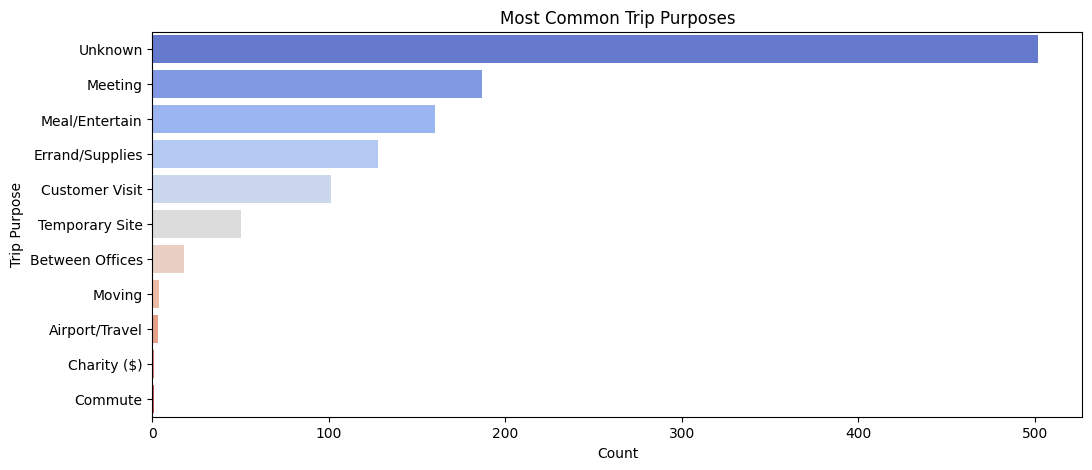

In [23]:
plt.figure(figsize=(12, 5))
sns.countplot(y=df1['PURPOSE'], order=df1['PURPOSE'].value_counts().index, palette="coolwarm")
plt.xlabel('Count')
plt.ylabel('Trip Purpose')
plt.title('Most Common Trip Purposes')
plt.show()


###2. **What are the most frequent start and stop locations?**\
   → Helps in identifying key locations for business operations, potential office locations, or travel hubs.


In [24]:
print("\nTop 10 Start Locations:")
print(df1['START'].value_counts().head(10))

print("\nTop 10 Stop Locations:")
print(df1['STOP'].value_counts().head(10))


Top 10 Start Locations:
START
Cary                201
Unknown Location    148
Morrisville          85
Whitebridge          68
Islamabad            57
Durham               37
Lahore               36
Raleigh              28
Kar?chi              27
Westpark Place       17
Name: count, dtype: int64

Top 10 Stop Locations:
STOP
Cary                203
Unknown Location    149
Morrisville          84
Whitebridge          65
Islamabad            58
Durham               36
Lahore               36
Raleigh              29
Kar?chi              26
Apex                 17
Name: count, dtype: int64


<ipython-input-25-710e76deb52c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df1['START'], order=df1['START'].value_counts().index[:10], ax=axes[0], palette="Blues_r")
<ipython-input-25-710e76deb52c>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df1['STOP'], order=df1['STOP'].value_counts().index[:10], ax=axes[1], palette="Reds_r")


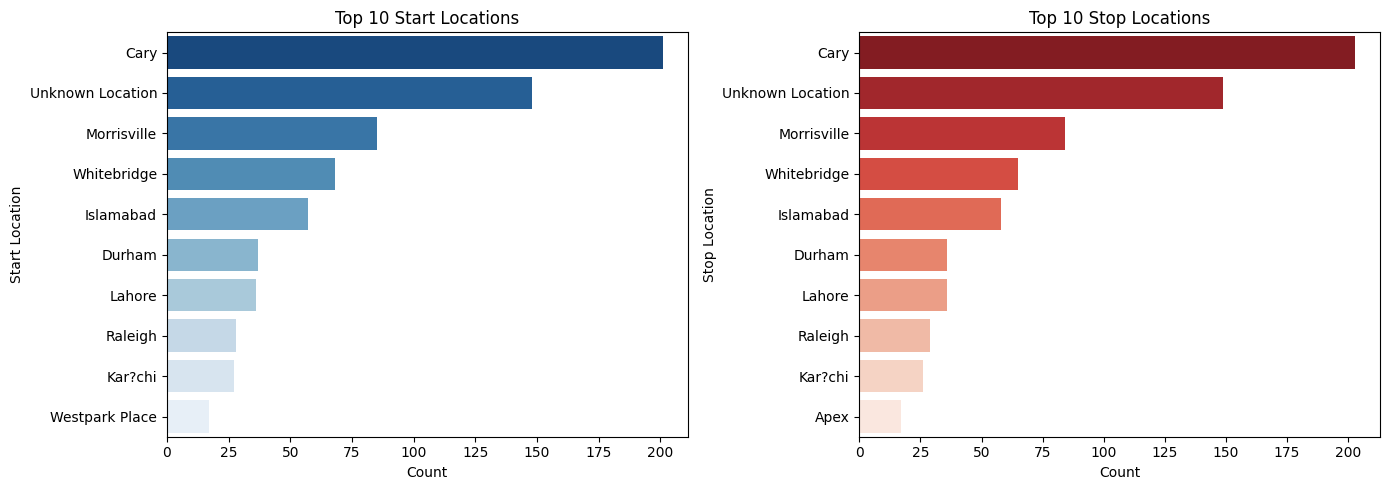

In [25]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.countplot(y=df1['START'], order=df1['START'].value_counts().index[:10], ax=axes[0], palette="Blues_r")
axes[0].set_title('Top 10 Start Locations')
axes[0].set_xlabel('Count')
axes[0].set_ylabel('Start Location')

sns.countplot(y=df1['STOP'], order=df1['STOP'].value_counts().index[:10], ax=axes[1], palette="Reds_r")
axes[1].set_title('Top 10 Stop Locations')
axes[1].set_xlabel('Count')
axes[1].set_ylabel('Stop Location')

plt.tight_layout()
plt.show()

###3. **What is the average miles per trip, and how does it vary by purpose?**\
   → Useful for cost estimation and route optimization.


In [26]:
average_miles = df1['MILES'].mean()
print(f"\nAverage miles per trip: {average_miles:.2f}")

miles_by_purpose = df1.groupby('PURPOSE')['MILES'].mean().sort_values(ascending=False)
print("\nAverage miles per trip by purpose:")
print(miles_by_purpose)


Average miles per trip: 10.57

Average miles per trip by purpose:
PURPOSE
Commute            180.200000
Customer Visit      20.688119
Meeting             15.247594
Charity ($)         15.100000
Between Offices     10.944444
Temporary Site      10.474000
Unknown              9.748008
Meal/Entertain       5.698125
Airport/Travel       5.500000
Moving               4.550000
Errand/Supplies      3.968750
Name: MILES, dtype: float64


<ipython-input-27-5b3ed5b8d854>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df1.groupby('PURPOSE')['MILES'].mean().index, y=df1.groupby('PURPOSE')['MILES'].mean().sort_values(ascending=False).values, palette="viridis")


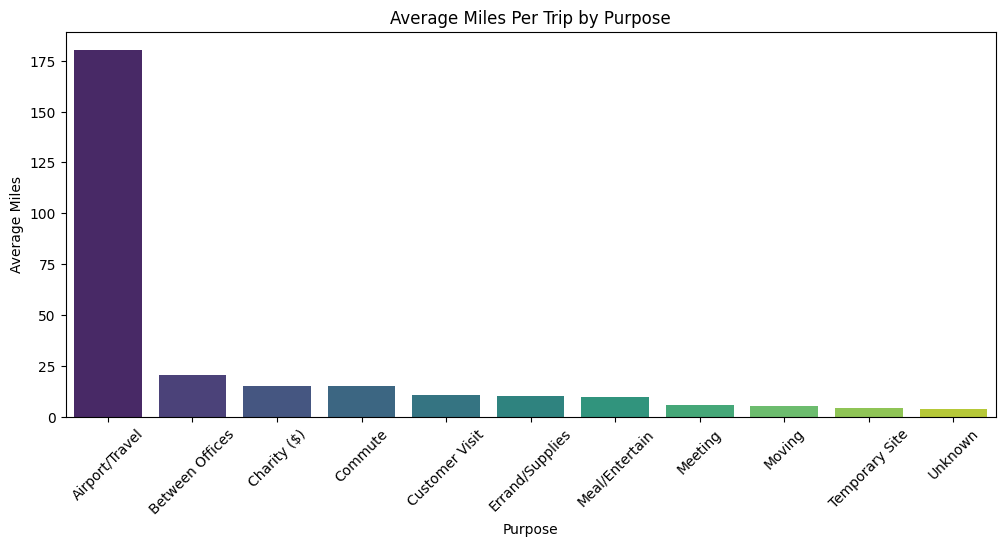

In [27]:
plt.figure(figsize=(12, 5))
sns.barplot(x=df1.groupby('PURPOSE')['MILES'].mean().index, y=df1.groupby('PURPOSE')['MILES'].mean().sort_values(ascending=False).values, palette="viridis")
plt.xlabel('Purpose')
plt.ylabel('Average Miles')
plt.title('Average Miles Per Trip by Purpose')
plt.xticks(rotation=45)
plt.show()

### **Time-based Analysis**



In [28]:
df1['START_DATE'].dtypes

dtype('O')

###4. **On which days or months do the most trips occur?**\
   → Helps in resource allocation and understanding seasonal trends.



<ipython-input-29-db7dd554d70c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['START_DATE'] = pd.to_datetime(df1['START_DATE'],format='mixed')
<ipython-input-29-db7dd554d70c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['DATE'] = df1['START_DATE'].dt.date
<ipython-input-29-db7dd554d70c>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyda


Top 10 Days with Most Trips:
DATE
2016-12-29    13
2016-06-27    11
2016-12-19    11
2016-02-21    11
2016-03-04    10
2016-12-21    10
2016-02-19    10
2016-11-13    10
2016-08-26    10
2016-08-22    10
dtype: int64


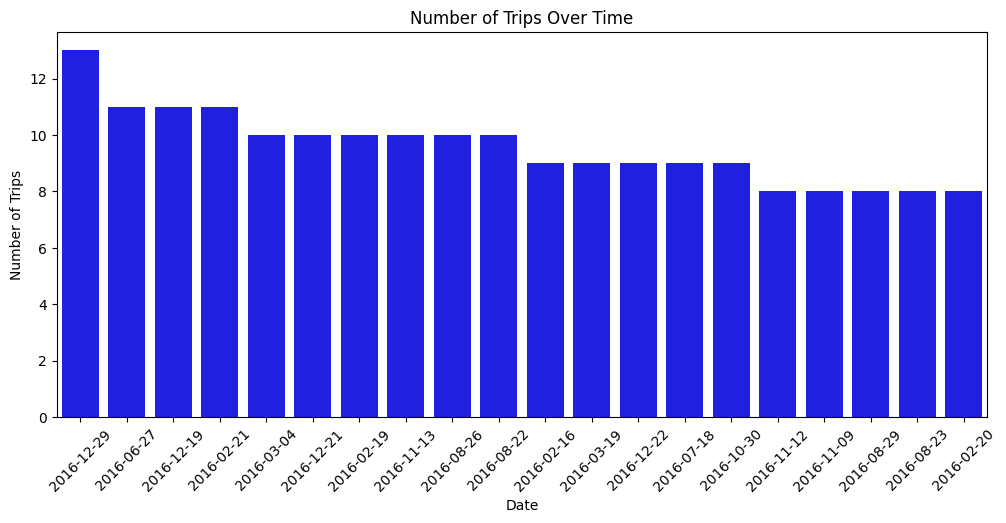

In [29]:
# Convert 'START_DATE' column to datetime objects
df1['START_DATE'] = pd.to_datetime(df1['START_DATE'],format='mixed')

# Now you can extract the date
df1['DATE'] = df1['START_DATE'].dt.date

# Convert 'START_DATE' column to datetime objects
df1['START_DATE'] = pd.to_datetime(df1['START_DATE'],format='mixed')

# Now you can extract the date
df1['DATE'] = df1['START_DATE'].dt.date

daily_trips = df1.groupby('DATE').size().sort_values(ascending=False).head(20)
print("\nTop 10 Days with Most Trips:")
print(daily_trips.head(10))
plt.figure(figsize=(12, 5))
# Use sns.barplot instead of plt.barplot
sns.barplot(x=daily_trips.index, y=daily_trips.values, color='b')
plt.xlabel('Date')
plt.ylabel('Number of Trips')
plt.title('Number of Trips Over Time')
plt.xticks(rotation=45)
plt.show()


####5. **What is the average duration of trips for different purposes?**\
   → Useful for scheduling and efficiency improvements.


In [30]:
df1['START_DATE'] = pd.to_datetime(df1['START_DATE'],format='mixed')
df1['END_DATE'] = pd.to_datetime(df1['END_DATE'], format='mixed')

df1['DURATION'] = (df1['END_DATE'] - df1['START_DATE']).dt.total_seconds() / 60
avg_duration_by_purpose = df1.groupby('PURPOSE')['DURATION'].mean().sort_values(ascending=False)
print("\nAverage trip duration (minutes) by purpose:")
print(avg_duration_by_purpose)



Average trip duration (minutes) by purpose:
PURPOSE
Commute            185.000000
Customer Visit      33.415842
Meeting             29.737968
Charity ($)         27.000000
Airport/Travel      26.000000
Temporary Site      25.860000
Between Offices     25.500000
Unknown             23.041833
Meal/Entertain      16.125000
Moving              15.000000
Errand/Supplies     12.976562
Name: DURATION, dtype: float64


<ipython-input-30-1732fe75a338>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['START_DATE'] = pd.to_datetime(df1['START_DATE'],format='mixed')
<ipython-input-30-1732fe75a338>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['END_DATE'] = pd.to_datetime(df1['END_DATE'], format='mixed')
<ipython-input-30-1732fe75a338>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the document

<ipython-input-31-10f81e7ec936>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df1.groupby('PURPOSE')['DURATION'].mean().index, y=df1.groupby('PURPOSE')['DURATION'].mean().sort_values(ascending=False).values, palette="magma")


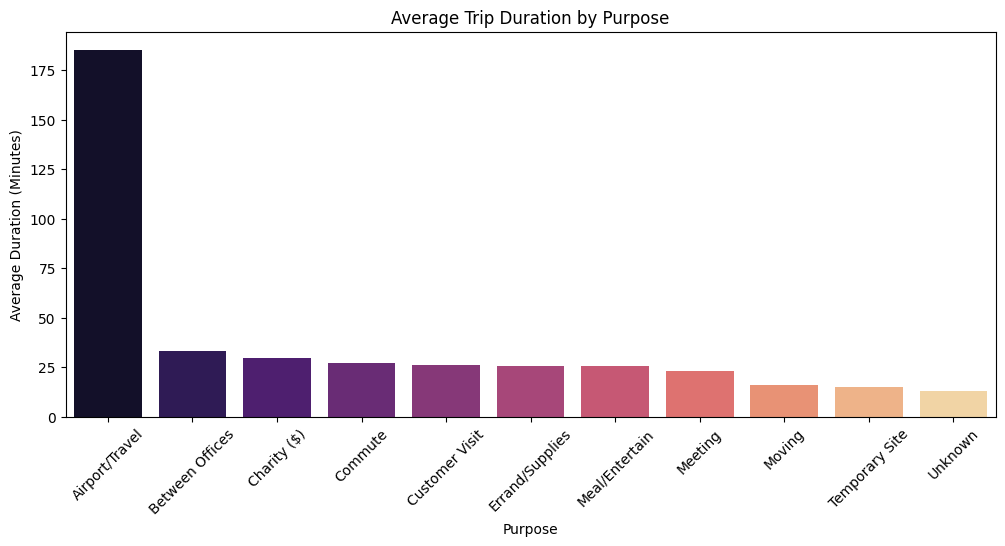

In [31]:
plt.figure(figsize=(12, 5))
sns.barplot(x=df1.groupby('PURPOSE')['DURATION'].mean().index, y=df1.groupby('PURPOSE')['DURATION'].mean().sort_values(ascending=False).values, palette="magma")
plt.xlabel('Purpose')
plt.ylabel('Average Duration (Minutes)')
plt.title('Average Trip Duration by Purpose')
plt.xticks(rotation=45)
plt.show()



### **Cost & Efficiency Analysis**




####6. **Which trips (purpose-wise) contribute to the highest mileage?**\
   → Helps in budgeting and optimizing cost-heavy trips.


In [32]:
total_miles_by_purpose = df.groupby('PURPOSE')['MILES'].sum().sort_values(ascending=False)
print("\nTotal miles traveled by purpose:")
print(total_miles_by_purpose)



Total miles traveled by purpose:
PURPOSE
Unknown            17098.2
Meeting             2851.3
Customer Visit      2089.5
Meal/Entertain       911.7
Temporary Site       523.7
Errand/Supplies      508.0
Between Offices      197.0
Commute              180.2
Moving                18.2
Airport/Travel        16.5
Charity ($)           15.1
Name: MILES, dtype: float64


<ipython-input-35-09ea76a3b451>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=total_miles_by_purpose.index, y=total_miles_by_purpose.values, palette="coolwarm")


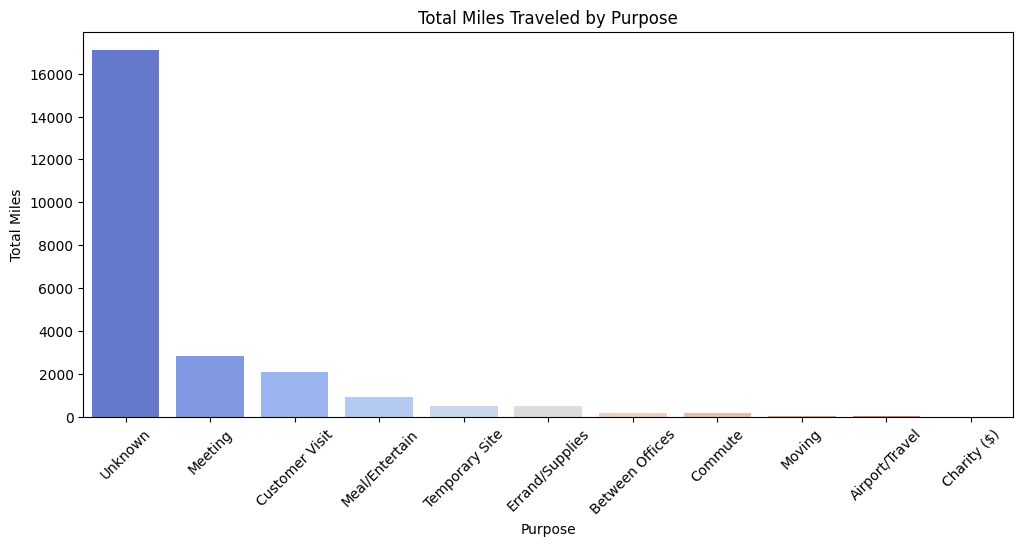

In [35]:
plt.figure(figsize=(12, 5))
sns.barplot(x=total_miles_by_purpose.index, y=total_miles_by_purpose.values, palette="coolwarm")
plt.xlabel('Purpose')
plt.ylabel('Total Miles')
plt.title('Total Miles Traveled by Purpose')
plt.xticks(rotation=45)
plt.show()

####7. **Are there any redundant or unnecessary short-distance trips that can be avoided?**\
   → Helps in reducing fuel consumption and improving efficiency.bold text

In [36]:
#Identifying redundant short-distance trips (e.g., trips under 2 miles)
short_trips = df[df['MILES'] < 2]
print(f"\nTotal number of short trips (<2 miles): {len(short_trips)}")



Total number of short trips (<2 miles): 158


## **Performance & Optimization**



###8. **Is there any correlation between trip distance and purpose?**\
   → Helps in optimizing travel for specific business needs.




<ipython-input-37-c35b1ad815e4>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='PURPOSE', y='MILES', data=df1, palette="Set3")


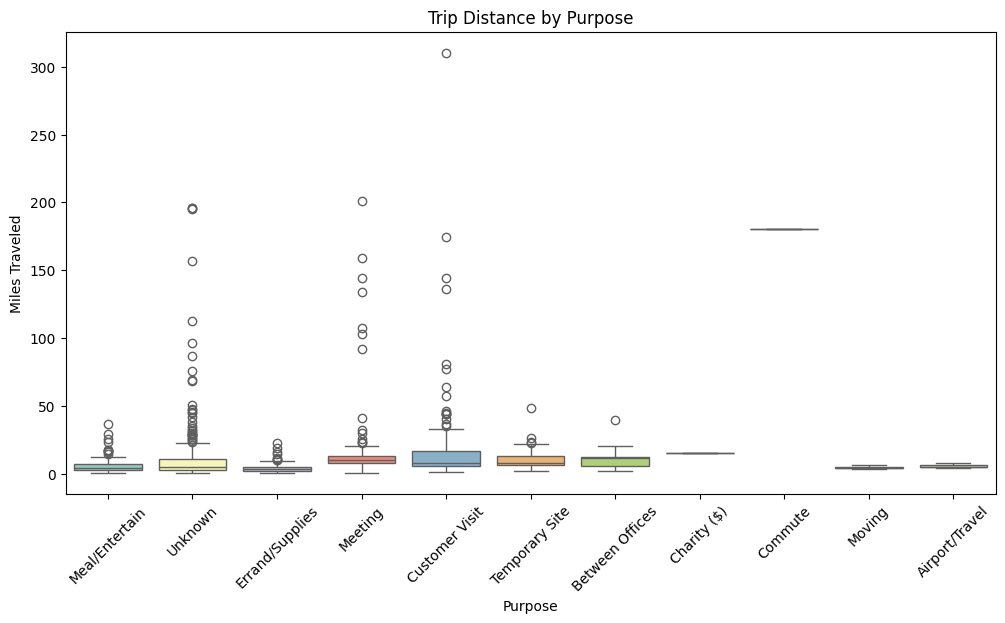

In [37]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='PURPOSE', y='MILES', data=df1, palette="Set3")
plt.xticks(rotation=45)
plt.title('Trip Distance by Purpose')
plt.xlabel('Purpose')
plt.ylabel('Miles Traveled')
plt.show()


###9. **What is the trend of miles traveled over time? Is travel increasing or decreasing?**\
   → Helps in assessing business expansion or contraction.



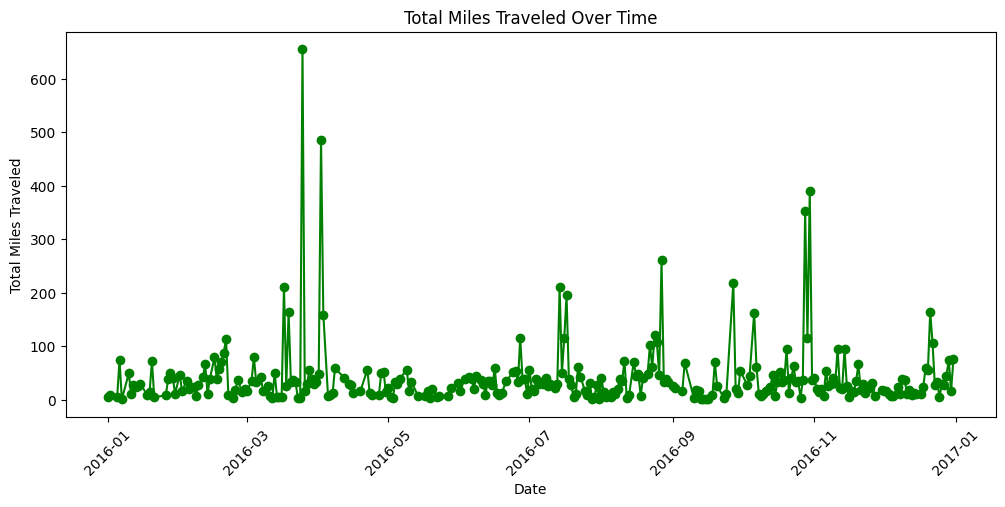

In [ ]:
daily_miles = df1.groupby('DATE')['MILES'].sum()

plt.figure(figsize=(12, 5))
plt.plot(daily_miles, marker='o', linestyle='-', color='g')
plt.xlabel('Date')
plt.ylabel('Total Miles Traveled')
plt.title('Total Miles Traveled Over Time')
plt.xticks(rotation=45)
plt.show()

###10. **Are there any unusual patterns in travel data, such as sudden spikes in mileage?**\
    → Helps detect anomalies, inefficiencies, or potential fraud.

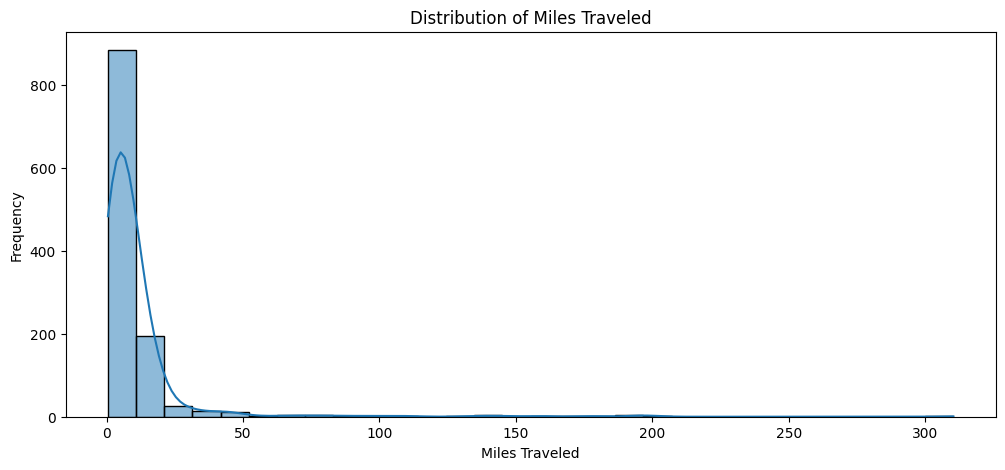

In [ ]:
plt.figure(figsize=(12, 5))
sns.histplot(df1['MILES'], bins=30, kde=True)
plt.xlabel('Miles Traveled')
plt.ylabel('Frequency')
plt.title('Distribution of Miles Traveled')
plt.show()

In [ ]:
# Identify trips with unusually high mileage (e.g., top 5%)
threshold = df1['MILES'].quantile(0.95)
unusual_trips = df[df['MILES'] > threshold]
print(f"\nTrips with unusually high mileage (above {threshold:.2f} miles):")
unusual_trips[['START_DATE', 'START', 'STOP', 'MILES', 'PURPOSE']]


Trips with unusually high mileage (above 28.10 miles):


,START_DATE,START,STOP,MILES,PURPOSE
4,2016-01-06 14:42:00,Fort Pierce,West Palm Beach,63.7,Customer Visit
36,2016-01-20 13:25:00,Raleigh,Cary,40.2,Customer Visit
108,2016-02-16 03:21:00,Katunayaka,Unknown Location,43.7,Customer Visit
232,2016-03-17 12:52:00,Austin,Katy,136.0,Customer Visit
233,2016-03-17 15:16:00,Katy,Houston,30.2,Meeting
245,2016-03-19 14:01:00,Sugar Land,Houston,35.1,Customer Visit
246,2016-03-19 15:34:00,Houston,Galveston,36.5,Meal/Entertain
251,2016-03-19 19:33:00,Galveston,Houston,57.0,Customer Visit
268,2016-03-25 13:24:00,Cary,Latta,144.0,Customer Visit
269,2016-03-25 16:52:00,Latta,Jacksonville,310.3,Customer Visit
